# Short Test 2 (Sem B)
## **Question 1**
Consider a rod of length $L=10cm$ with heat diffusion coefficient $\alpha=0.735cm^2s$.

The boundary conditions are $u(t,0)=100\degree C$ and $u(t,L)=25\degree C$.

Take $\Delta x=0.2cm$ and $\Delta t=0.01s$.

### **Part A:** Solve the diffusion equation using the explicit Euler method.
Diffusion equation is given by
$$
\frac{\partial u(t,\mathbf{r})}{\partial t}= \alpha\nabla^2u(t,\mathbf{r})
$$
In one-dimension, and with our known values, this becomes
$$
\forall x:0\leq x\leq10,\frac{\partial u(t,x)}{\partial t}= (0.755)\frac{\partial^2}{\partial x^2}u(t,x)
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# define params
length = 10.0
heatCoeff = 0.735
xstep = 0.2
tstep = 0.01

(1201, 51)


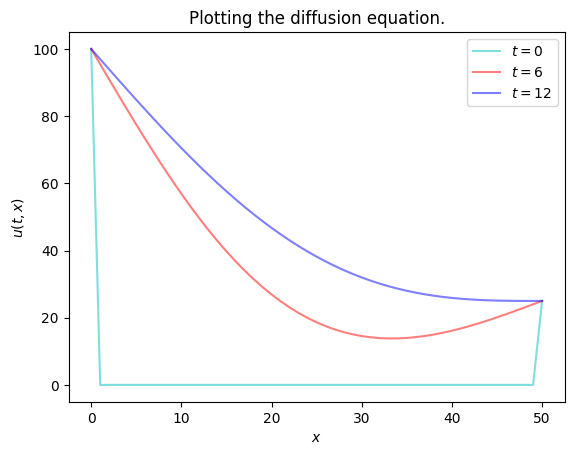

In [11]:
# Solving a PDE (1D diffusion equation) using explicit scheme
#
# 2024: B. Vorselaars - modified
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L=10.0  # length of bar
xmax=L  # maximum value of x
dx=0.2  # spatial spacing
dt=0.01 # time integration step
t0=0.0 # start time
tmax=12.0 # end time
a=0.735 # diffusion coefficient

# Number of spatial points
nx=int(round(xmax/dx))+1

# Number of time points
nt=int(round((tmax-t0)/dt))+1

# The solution of u at the grid points will be stored in this 2D array
u_tx=np.zeros((nt, nx))

u0=0.0
# initial condition: u(t=0,x)=u0
for ix in range(nx):
    u_tx[0,ix]=u0

# boundary conditions
u_L=100.0 # left
u_R=25.0 # right
for it in range(nt):
    u_tx[it,0]=u_L
    u_tx[it,nx-1]=u_R

t=t0
# Integrating the PDE in time
for it in range(nt-1):
    tnext=t+dt

    # update all internal points
    for ix in range(1,nx-1): 
        u_tx[it+1,ix] = 1-(2*(dt/pow(dx,2)))
        u_tx[it+1,ix] *= u_tx[it,ix]
        u_tx[it+1,ix] += (dt/pow(dx,2))*(u_tx[it,ix+1]+u_tx[it,ix-1])

    t=tnext
print(u_tx.shape)

# plot the solution
fig, ax = plt.subplots()
X = np.arange(0,51)
Y0,Y6,Y12 = u_tx[0][X], u_tx[round(6/dt)][X], u_tx[round(12/dt)][X]
ax.plot(X, Y0, color="c", alpha=0.5, linestyle='-', label=r'$t=0$')
ax.plot(X, Y6, color="r", alpha=0.5, linestyle='-', label=r'$t=6$')
ax.plot(X, Y12, color="b", alpha=0.5, linestyle='-', label=r'$t=12$')
#ax.plot(X1, Y1, color="C1", marker='x', linestyle='none', label='')
ax.set_title('Plotting the diffusion equation.')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u(t,x)$')
ax.legend(loc="upper right")
